In [193]:
#PRE REQUISITES

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy
from random_forest import bootstrapping
from random_forest import random_forest_algorithm
from random_forest import random_forest_predictions


In [195]:
df= pd.read_csv("wnqt.csv")


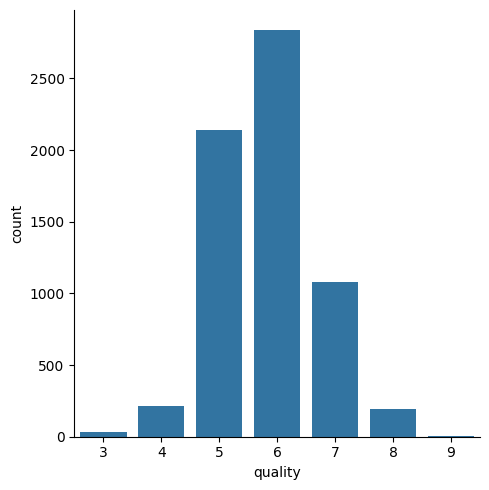

In [196]:
sns.catplot(x='quality',data=df,kind='count')

<AxesSubplot: xlabel='quality', ylabel='volatile_acidity'>

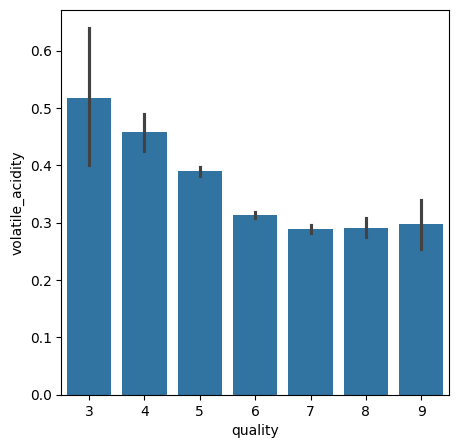

In [197]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile_acidity',data=df)

<AxesSubplot: xlabel='quality', ylabel='citric_acid'>

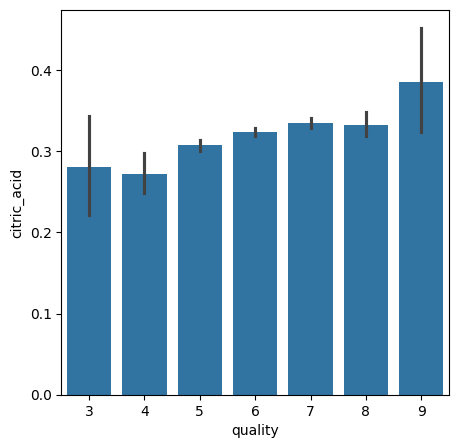

In [198]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric_acid',data=df)

In [199]:
correlation=df.corr(numeric_only=True)

<AxesSubplot: >

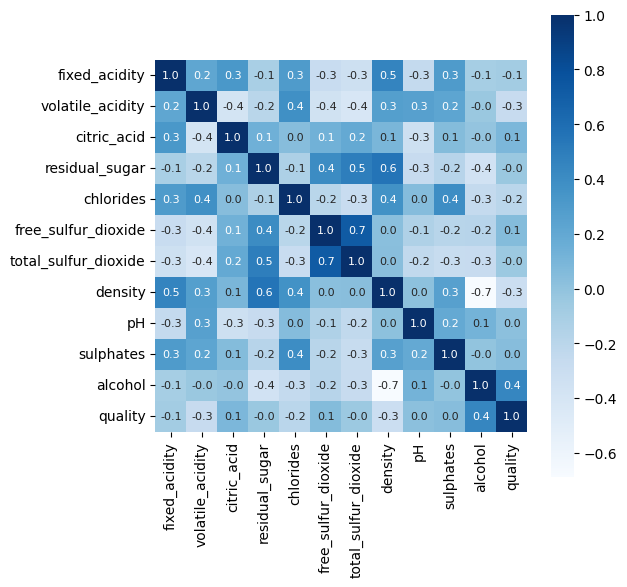

In [200]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [201]:
# duplicate=print(df.duplicated)

In [202]:
# df= data.drop_duplicates()

In [203]:
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


<AxesSubplot: >

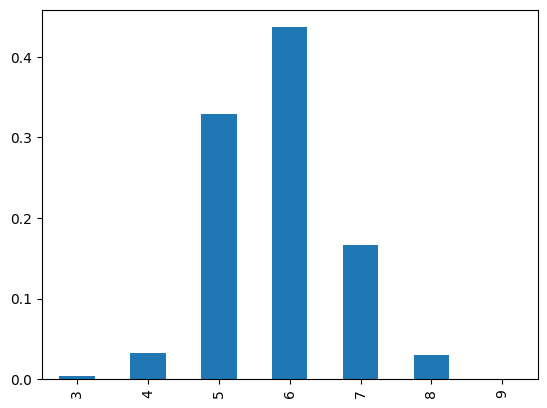

In [204]:
wine_quality = df.label.value_counts(normalize=True)
wine_quality = wine_quality.sort_index()
wine_quality.plot(kind="bar")

In [205]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color                   0
label                   0
dtype: int64

In [206]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [207]:
def transform_label(value):
    if value <= 5:
        return "Bad"
    else:
        return "Good"

df["label"] = df.label.apply(transform_label)

Good    0.633061
Bad     0.366939
Name: label, dtype: float64

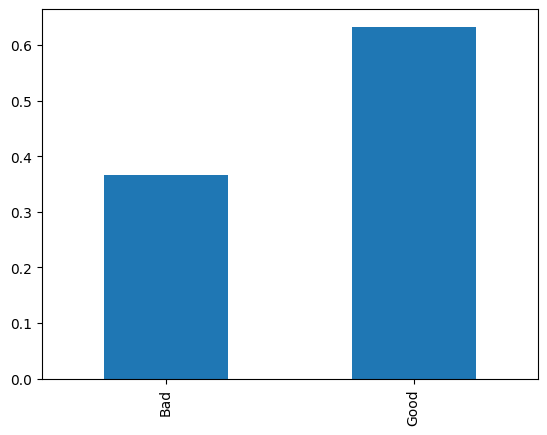

In [208]:
wine_quality = df.label.value_counts(normalize=True)
wine_quality[["Bad", "Good"]].plot(kind="bar")
wine_quality

In [209]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.3)

In [210]:
len(train_df)

4548

In [211]:
len(test_df)

1949

In [212]:
min_value = df['fixed_acidity'].min()
max_value = df['fixed_acidity'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 3.8, Maximum value: 15.9


In [213]:
min_value = df['volatile_acidity'].min()
max_value = df['volatile_acidity'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.08, Maximum value: 1.58


In [214]:
min_value = df['citric_acid'].min()
max_value = df['citric_acid'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.0, Maximum value: 1.66


In [215]:
min_value = df['residual_sugar'].min()
max_value = df['residual_sugar'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.6, Maximum value: 65.8


In [216]:
min_value = df['chlorides'].min()
max_value = df['chlorides'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.009, Maximum value: 0.611


In [217]:
min_value = df['free_sulfur_dioxide'].min()
max_value = df['free_sulfur_dioxide'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 1.0, Maximum value: 289.0


In [218]:
min_value = df['total_sulfur_dioxide'].min()
max_value = df['total_sulfur_dioxide'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 6.0, Maximum value: 440.0


In [219]:
min_value = df['density'].min()
max_value = df['density'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.98711, Maximum value: 1.03898


In [220]:
min_value = df['alcohol'].min()
max_value = df['alcohol'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 8.0, Maximum value: 14.9


In [221]:
min_value = df['sulphates'].min()
max_value = df['sulphates'].max()
print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0.22, Maximum value: 2.0


In [222]:
# def bootstrapping(train_df, n_bootstrap):
#     bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
#     df_bootstrapped = train_df.iloc[bootstrap_indices]
    
#     return df_bootstrapped

# def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
#     forest = []
#     for i in range(n_trees):
#         df_bootstrapped = bootstrapping(train_df, n_bootstrap)
#         tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
#         forest.append(tree)
    
#     return forest

# def random_forest_predictions(test_df, forest):
#     df_predictions = {}
#     for i in range(len(forest)):
#         column_name = "tree_{}".format(i)
#         predictions = decision_tree_predictions(test_df,tree=forest[i])
#         df_predictions[column_name] = predictions

#     df_predictions=pd.DataFrame(df_predictions)
#     random_forest_predictions = df_predictions.mode(axis=1)[0]

#     return random_forest_predictions


In [223]:
accuracies = []
for i in range(4) :   
    forest = random_forest_algorithm(train_df, n_trees=10, n_bootstrap=900, n_features=3, dt_max_depth=20)
    predictions = random_forest_predictions(test_df, forest)
    accuracy = calculate_accuracy(predictions, test_df.label)
    
    print(accuracy)
    accuracies.append(accuracy)

print("average accuracy : {}".format(np.array(accuracies).mean()))

0.7644946126218574
0.7711646998460749
0.7773217034376604
0.7634684453565931
average accuracy : 0.7691123653155464


In [237]:
accuracies = []
for i in range(5) :   
    forest = random_forest_algorithm(train_df, n_trees=10, n_bootstrap=len(train_df), n_features=3, dt_max_depth=20)
    predictions = random_forest_predictions(test_df, forest)
    accuracy = calculate_accuracy(predictions, test_df.label)
    
    print(accuracy)
    accuracies.append(accuracy)

print("average accuracy : {}".format(np.array(accuracies).mean()))

0.818881477680862
0.8147768086198051
0.8178553104155978
0.8034889687018985
0.8193945613134941
average accuracy : 0.8148794253463315


In [225]:
len(train_df)

4548

df_predictions = {}
for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    predictions = decision_tree_predictions(test_df,tree=forest[i])
    df_predictions[column_name] = predictions

df_predictions=pd.DataFrame(df_predictions)
random_forest_predictions = df_predictions.mode(axis=1)[0]

df_predictions.head(8)

df_predictions.mode(axis=1)[0].head(8)

In [226]:
#MAKING BOOTSTRAPPING AND RANDOMSPACE METHOD


bootstrapping(train_df, n_bootstrap=100).duplicated()[:30]

In [227]:
#MAKING POTENTIAL SPLIT FUNCTION

def get_potential_splits(data, random_subspace):
    
    potential_splits = {}
    _, n_columns = data.shape
    column_indices = list(range(n_columns - 1))  # excluding the last column which is the label

    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(population=column_indices, k=random_subspace)

    
    for column_index in column_indices:  
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

get_potential_splits(train_df.values, random_subspace=20)

In [228]:
#CHECKING THE LENGTH OF COLUMNS

len(train_df.columns)

In [229]:
#MAKING POTENTIAL SPLIT FUNCTION [DONE]

In [230]:
#MADE BOOTSTRAPPING AND RANDOMSPACE METHOD

In [231]:
input_data = (8.9, 0.2,	0.48, 1.8, 0.077, 29, 60, 0.9968, 3.39, 0.53, 9.4)
feature_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

input_data_dict = dict(zip(feature_names, input_data))
input_data_df = pd.DataFrame([input_data_dict])
forest = random_forest_algorithm(train_df, n_trees=1, n_bootstrap=len(train_df), n_features=1000, dt_max_depth=4)
predictions = random_forest_predictions(input_data_df, forest)
print(predictions)

0    Good
Name: 0, dtype: object


In [232]:
import joblib

In [233]:
# joblib.dump(forest, 'models/winequality_model.pkl')

In [234]:
# loaded_model = joblib.load('models/winequality_model.pkl')

In [235]:
from joblib import dump

In [236]:
dump(forest, 'trained_model.joblib')

['trained_model.joblib']